# PZ-5.2_Community

## Изучение алгоритмов выделения сообществ, основанных на разрезах графов


## 1. Алгоритм Кернигана-Лина (разделение графа на два сообщества c применением критерия минимального веса разреза)
## 2. Алгоритм Гирвана-Ньюмена (удаление рёбер с максимальной промежуточностью).
## 3. Алгоритм Каргера (вероятностный алгоритм нахождения минимального разреза в графе).

## Задание ПЗ-5.2
- 1. Создать тестовый граф (рисунок см. ниже). Такой граф естественным образом распадается по крайней мере на четыре непересекающихся сообщества. Граф образован путём объединения одним ребром двух связных компонент. Первая связная компонента представляет собой "ветряную мельницу", состоящую из трёх клик по 4 узла каждая, объединённых одним общим узлом. Вторая связная копонента представляет собой кольцо клик по 5 узлов каждая.
- 2. Создать функцию цветной визуализации сообществ графа (функция выдаёт на печать общую информацию по анализируемому графу, списки вершин выделяемых сообществ и цветной рисунок графа).
- 3. Выполнить выделение сообществ по алгоритму Кернигана-Лина (получить по крайней мере 4 сообщества). 
- 4. Выполнить выделение сообществ по алгоритму Гирвана-Ньюмена (получить по крайней мере 4 сообщества). 
- 5. Изучить описание алгоритма Каргера, разработать соответствующую функцию выделения сообществ и применить её к тестовому графу.
- 6. Модифицировать тестовый граф путём добавления ещё одного ребра (см. рис. ниже). Повторить п.п. 3-5.

Результаты работы сохранить в файле PZ-5.2(N)28.10.20.ipynb , где N- порядковый номер по журналу. Файл должен содержать комментарии, поясняющие действия и их результаты.

## Логика поиска сообществ в социальной сети
- граф связный? Компоненты связности - кандидаты на сообщества
- связная компонента - какой граф (простой, ориентированный, двудольный)
- подбор алгоритма выделения сообществ
- оценка качества выделения

In [1]:
from networkx.generators.community import windmill_graph
from networkx.generators.community import ring_of_cliques
from networkx.algorithms.community.quality import coverage
from matplotlib import pyplot as plt
import networkx as nx
from networkx.algorithms.community import kernighan_lin_bisection
from networkx.algorithms.community import girvan_newman
import random as r

In [3]:
def plot_graph(G, draw_type=None, weight_name=None, node_color='#1f78b4'):
    pos = nx.spring_layout(G)
    edges = G.edges()
    weights = None
    
    if weight_name:
        weights = [int(G[u][v][weight_name]) for u,v in edges]
        labels = nx.get_edge_attributes(G,weight_name)
        nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
        nx.draw_networkx(G, pos, width=weights);
    else:
        if draw_type == "circular":
            nx.draw_circular(G, node_color=node_color)
        elif draw_type == "random":
            nx.draw_random(G, node_color=node_color)
        elif draw_type == "spectral":
            nx.draw_spectral(G, node_color=node_color)
        elif draw_type == "spring":
            nx.draw_spring(G, node_color=node_color)
        else:
            nx.draw(G, with_labels=True, node_color=node_color)
    plt.show()

# 1
Создать тестовый граф (рисунок см. ниже). Такой граф естественным образом распадается по крайней мере на четыре непересекающихся сообщества. Граф образован путём объединения одним ребром двух связных компонент. Первая связная компонента представляет собой "ветряную мельницу", состоящую из трёх клик по 4 узла каждая, объединённых одним общим узлом. Вторая связная копонента представляет собой кольцо клик по 5 узлов каждая.

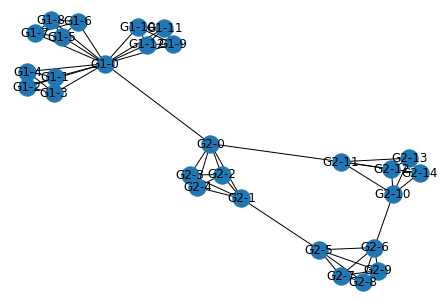

In [33]:
G1 = windmill_graph(3, 5)
G2 = ring_of_cliques(3, 5)
T = nx.union(G1, G2, ("G1-", "G2-"))
T.add_edge("G1-0", "G2-0")

plot_graph(T)

Рисунок 1: test_graph-1
<img src="test_graph-1.png" width=600>

# 2
Создать функцию цветной визуализации сообществ графа (функция выдаёт на печать общую информацию по анализируемому графу, списки вершин выделяемых сообществ и цветной рисунок графа).

In [5]:
def painter(T, result):
    print(f"Nodes count: {len(T.nodes())}")
    print(f"Edges count: {len(T.edges())}")
    print(f"Connect: {nx.is_connected(T)}")
    for sub_result in result:
        print(sub_result)
    color_list = get_color(len(result))
    color_map = list()
    buff = T.nodes()
    for node in buff:
        for index in range(len(result)):  
            if node in result[index]:  
                color_map.append(color_list[index])
    plot_graph(T, node_color=color_map)

def get_color(count):
    return [(r.random(), r.random(), r.random(),) for _ in range(count)]

# 3
Выполнить выделение сообществ по алгоритму Кернигана-Лина

Nodes count: 28
Edges count: 64
Connect: True
{'G2-10', 'G1-11', 'G2-4', 'G2-1', 'G2-2', 'G1-10', 'G2-3', 'G2-14', 'G2-12', 'G2-0', 'G2-5', 'G2-13', 'G2-11', 'G1-12'}
{'G1-1', 'G1-6', 'G2-7', 'G1-0', 'G1-7', 'G1-3', 'G2-6', 'G1-4', 'G1-9', 'G2-9', 'G1-5', 'G1-2', 'G1-8', 'G2-8'}


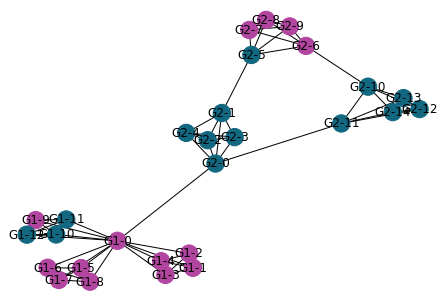

In [6]:
painter(T, kernighan_lin_bisection(T))

# 4
Выполнить выделение сообществ по алгоритму Гирвана-Ньюмена (получить по крайней мере 4 сообщества).

Nodes count: 28
Edges count: 64
Connect: True
{'G1-1', 'G1-6', 'G1-11', 'G1-5', 'G1-0', 'G1-2', 'G1-4', 'G1-9', 'G1-7', 'G1-3', 'G1-8', 'G1-10', 'G1-12'}
{'G2-10', 'G2-4', 'G2-7', 'G2-8', 'G2-1', 'G2-2', 'G2-3', 'G2-6', 'G2-9', 'G2-14', 'G2-0', 'G2-5', 'G2-12', 'G2-13', 'G2-11'}


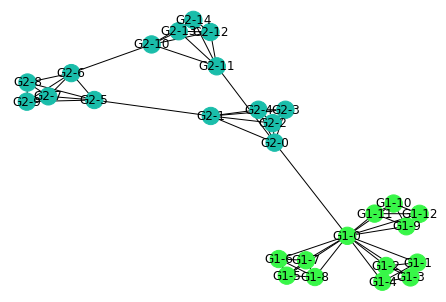

Nodes count: 28
Edges count: 64
Connect: True
{'G1-1', 'G1-6', 'G1-11', 'G1-5', 'G1-0', 'G1-2', 'G1-4', 'G1-9', 'G1-7', 'G1-3', 'G1-8', 'G1-10', 'G1-12'}
{'G2-4', 'G2-1', 'G2-2', 'G2-3', 'G2-0'}
{'G2-11', 'G2-10', 'G2-7', 'G2-6', 'G2-9', 'G2-14', 'G2-5', 'G2-12', 'G2-13', 'G2-8'}


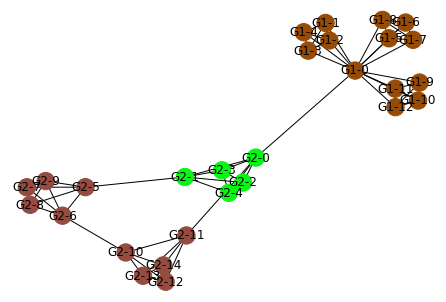

Nodes count: 28
Edges count: 64
Connect: True
{'G1-1', 'G1-6', 'G1-11', 'G1-5', 'G1-0', 'G1-2', 'G1-4', 'G1-9', 'G1-7', 'G1-3', 'G1-8', 'G1-10', 'G1-12'}
{'G2-4', 'G2-1', 'G2-2', 'G2-3', 'G2-0'}
{'G2-7', 'G2-6', 'G2-9', 'G2-5', 'G2-8'}
{'G2-10', 'G2-14', 'G2-12', 'G2-13', 'G2-11'}


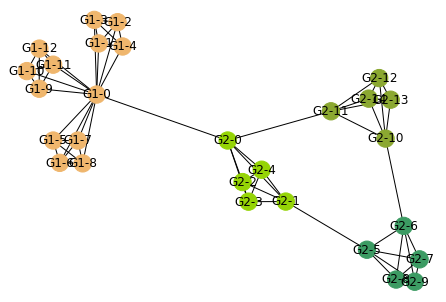

Nodes count: 28
Edges count: 64
Connect: True
{'G1-6', 'G1-11', 'G1-5', 'G1-0', 'G1-9', 'G1-7', 'G1-8', 'G1-10', 'G1-12'}
{'G1-3', 'G1-1', 'G1-2', 'G1-4'}
{'G2-4', 'G2-1', 'G2-2', 'G2-3', 'G2-0'}
{'G2-7', 'G2-6', 'G2-9', 'G2-5', 'G2-8'}
{'G2-10', 'G2-14', 'G2-12', 'G2-13', 'G2-11'}


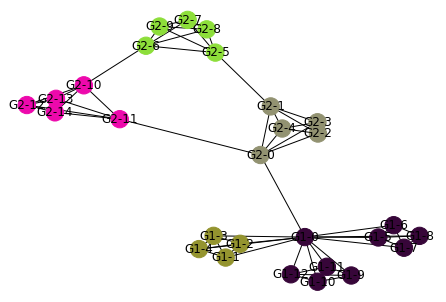

Nodes count: 28
Edges count: 64
Connect: True
{'G1-11', 'G1-0', 'G1-9', 'G1-12', 'G1-10'}
{'G1-3', 'G1-1', 'G1-2', 'G1-4'}
{'G1-6', 'G1-5', 'G1-7', 'G1-8'}
{'G2-4', 'G2-1', 'G2-2', 'G2-3', 'G2-0'}
{'G2-7', 'G2-6', 'G2-9', 'G2-5', 'G2-8'}
{'G2-10', 'G2-14', 'G2-12', 'G2-13', 'G2-11'}


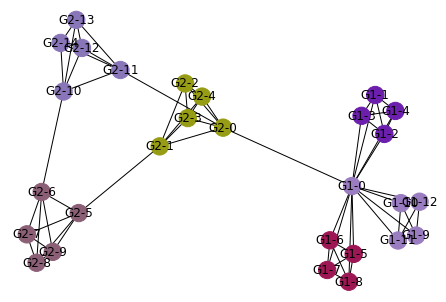

Nodes count: 28
Edges count: 64
Connect: True
{'G1-0'}
{'G1-3', 'G1-1', 'G1-2', 'G1-4'}
{'G1-6', 'G1-5', 'G1-7', 'G1-8'}
{'G1-10', 'G1-12', 'G1-9', 'G1-11'}
{'G2-4', 'G2-1', 'G2-2', 'G2-3', 'G2-0'}
{'G2-7', 'G2-6', 'G2-9', 'G2-5', 'G2-8'}
{'G2-10', 'G2-14', 'G2-12', 'G2-13', 'G2-11'}


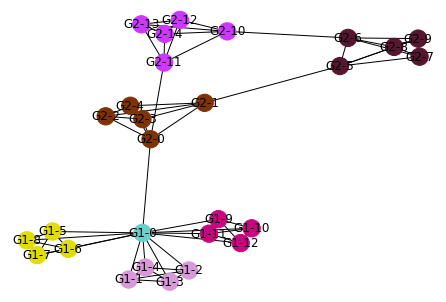

Nodes count: 28
Edges count: 64
Connect: True
{'G1-0'}
{'G1-1'}
{'G1-3', 'G1-2', 'G1-4'}
{'G1-6', 'G1-5', 'G1-7', 'G1-8'}
{'G1-10', 'G1-12', 'G1-9', 'G1-11'}
{'G2-4', 'G2-1', 'G2-2', 'G2-3', 'G2-0'}
{'G2-7', 'G2-6', 'G2-9', 'G2-5', 'G2-8'}
{'G2-10', 'G2-14', 'G2-12', 'G2-13', 'G2-11'}


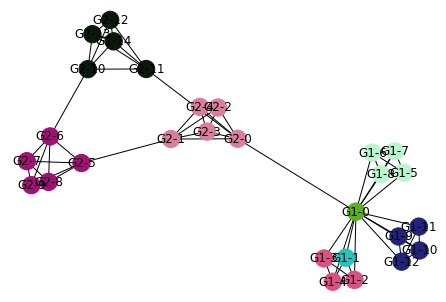

Nodes count: 28
Edges count: 64
Connect: True
{'G1-0'}
{'G1-1'}
{'G1-2'}
{'G1-3', 'G1-4'}
{'G1-6', 'G1-5', 'G1-7', 'G1-8'}
{'G1-10', 'G1-12', 'G1-9', 'G1-11'}
{'G2-4', 'G2-1', 'G2-2', 'G2-3', 'G2-0'}
{'G2-7', 'G2-6', 'G2-9', 'G2-5', 'G2-8'}
{'G2-10', 'G2-14', 'G2-12', 'G2-13', 'G2-11'}


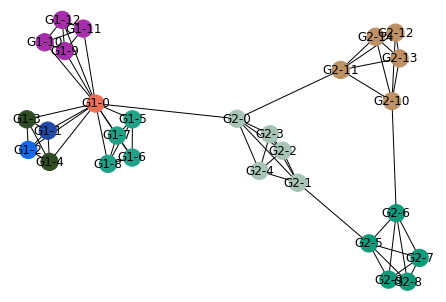

Nodes count: 28
Edges count: 64
Connect: True
{'G1-0'}
{'G1-1'}
{'G1-2'}
{'G1-3'}
{'G1-4'}
{'G1-6', 'G1-5', 'G1-7', 'G1-8'}
{'G1-10', 'G1-12', 'G1-9', 'G1-11'}
{'G2-4', 'G2-1', 'G2-2', 'G2-3', 'G2-0'}
{'G2-7', 'G2-6', 'G2-9', 'G2-5', 'G2-8'}
{'G2-10', 'G2-14', 'G2-12', 'G2-13', 'G2-11'}


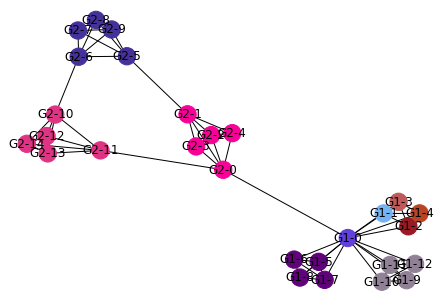

Nodes count: 28
Edges count: 64
Connect: True
{'G1-0'}
{'G1-1'}
{'G1-2'}
{'G1-3'}
{'G1-4'}
{'G1-5'}
{'G1-8', 'G1-7', 'G1-6'}
{'G1-10', 'G1-12', 'G1-9', 'G1-11'}
{'G2-4', 'G2-1', 'G2-2', 'G2-3', 'G2-0'}
{'G2-7', 'G2-6', 'G2-9', 'G2-5', 'G2-8'}
{'G2-10', 'G2-14', 'G2-12', 'G2-13', 'G2-11'}


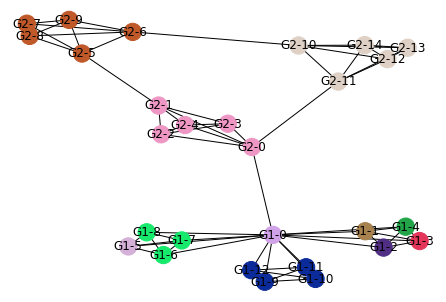

Nodes count: 28
Edges count: 64
Connect: True
{'G1-0'}
{'G1-1'}
{'G1-2'}
{'G1-3'}
{'G1-4'}
{'G1-5'}
{'G1-6'}
{'G1-7', 'G1-8'}
{'G1-10', 'G1-12', 'G1-9', 'G1-11'}
{'G2-4', 'G2-1', 'G2-2', 'G2-3', 'G2-0'}
{'G2-7', 'G2-6', 'G2-9', 'G2-5', 'G2-8'}
{'G2-10', 'G2-14', 'G2-12', 'G2-13', 'G2-11'}


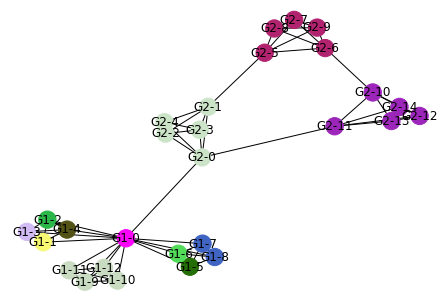

Nodes count: 28
Edges count: 64
Connect: True
{'G1-0'}
{'G1-1'}
{'G1-2'}
{'G1-3'}
{'G1-4'}
{'G1-5'}
{'G1-6'}
{'G1-7'}
{'G1-8'}
{'G1-10', 'G1-12', 'G1-9', 'G1-11'}
{'G2-4', 'G2-1', 'G2-2', 'G2-3', 'G2-0'}
{'G2-7', 'G2-6', 'G2-9', 'G2-5', 'G2-8'}
{'G2-10', 'G2-14', 'G2-12', 'G2-13', 'G2-11'}


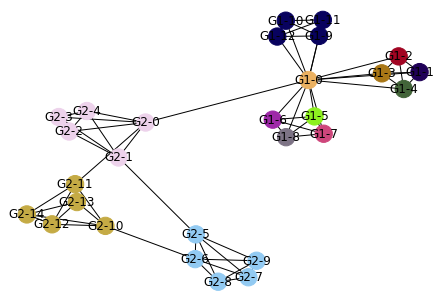

Nodes count: 28
Edges count: 64
Connect: True
{'G1-0'}
{'G1-1'}
{'G1-2'}
{'G1-3'}
{'G1-4'}
{'G1-5'}
{'G1-6'}
{'G1-7'}
{'G1-8'}
{'G1-9'}
{'G1-11', 'G1-12', 'G1-10'}
{'G2-4', 'G2-1', 'G2-2', 'G2-3', 'G2-0'}
{'G2-7', 'G2-6', 'G2-9', 'G2-5', 'G2-8'}
{'G2-10', 'G2-14', 'G2-12', 'G2-13', 'G2-11'}


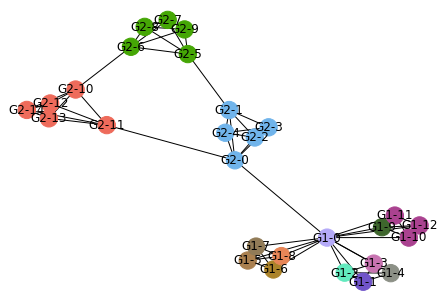

Nodes count: 28
Edges count: 64
Connect: True
{'G1-0'}
{'G1-1'}
{'G1-2'}
{'G1-3'}
{'G1-4'}
{'G1-5'}
{'G1-6'}
{'G1-7'}
{'G1-8'}
{'G1-9'}
{'G1-10'}
{'G1-12', 'G1-11'}
{'G2-4', 'G2-1', 'G2-2', 'G2-3', 'G2-0'}
{'G2-7', 'G2-6', 'G2-9', 'G2-5', 'G2-8'}
{'G2-10', 'G2-14', 'G2-12', 'G2-13', 'G2-11'}


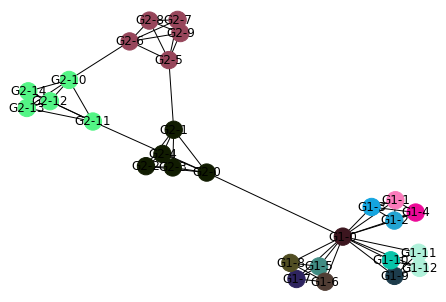

Nodes count: 28
Edges count: 64
Connect: True
{'G1-0'}
{'G1-1'}
{'G1-2'}
{'G1-3'}
{'G1-4'}
{'G1-5'}
{'G1-6'}
{'G1-7'}
{'G1-8'}
{'G1-9'}
{'G1-10'}
{'G1-11'}
{'G1-12'}
{'G2-4', 'G2-1', 'G2-2', 'G2-3', 'G2-0'}
{'G2-7', 'G2-6', 'G2-9', 'G2-5', 'G2-8'}
{'G2-10', 'G2-14', 'G2-12', 'G2-13', 'G2-11'}


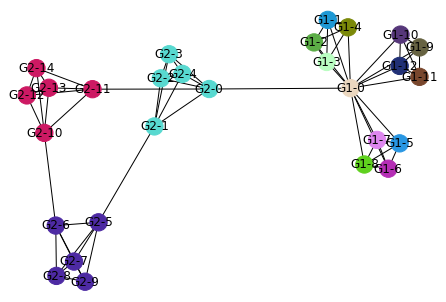

Nodes count: 28
Edges count: 64
Connect: True
{'G1-0'}
{'G1-1'}
{'G1-2'}
{'G1-3'}
{'G1-4'}
{'G1-5'}
{'G1-6'}
{'G1-7'}
{'G1-8'}
{'G1-9'}
{'G1-10'}
{'G1-11'}
{'G1-12'}
{'G2-0'}
{'G2-1', 'G2-2', 'G2-3', 'G2-4'}
{'G2-7', 'G2-6', 'G2-9', 'G2-5', 'G2-8'}
{'G2-10', 'G2-14', 'G2-12', 'G2-13', 'G2-11'}


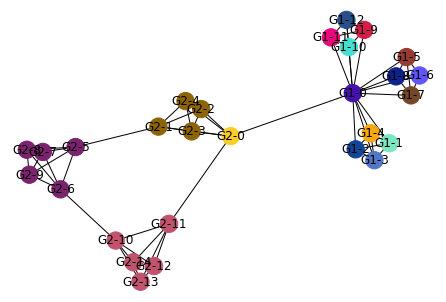

Nodes count: 28
Edges count: 64
Connect: True
{'G1-0'}
{'G1-1'}
{'G1-2'}
{'G1-3'}
{'G1-4'}
{'G1-5'}
{'G1-6'}
{'G1-7'}
{'G1-8'}
{'G1-9'}
{'G1-10'}
{'G1-11'}
{'G1-12'}
{'G2-0'}
{'G2-1'}
{'G2-2', 'G2-3', 'G2-4'}
{'G2-7', 'G2-6', 'G2-9', 'G2-5', 'G2-8'}
{'G2-10', 'G2-14', 'G2-12', 'G2-13', 'G2-11'}


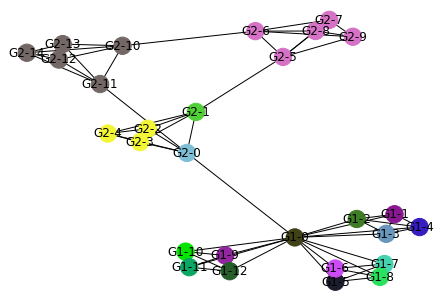

Nodes count: 28
Edges count: 64
Connect: True
{'G1-0'}
{'G1-1'}
{'G1-2'}
{'G1-3'}
{'G1-4'}
{'G1-5'}
{'G1-6'}
{'G1-7'}
{'G1-8'}
{'G1-9'}
{'G1-10'}
{'G1-11'}
{'G1-12'}
{'G2-0'}
{'G2-1'}
{'G2-2'}
{'G2-3', 'G2-4'}
{'G2-7', 'G2-6', 'G2-9', 'G2-5', 'G2-8'}
{'G2-10', 'G2-14', 'G2-12', 'G2-13', 'G2-11'}


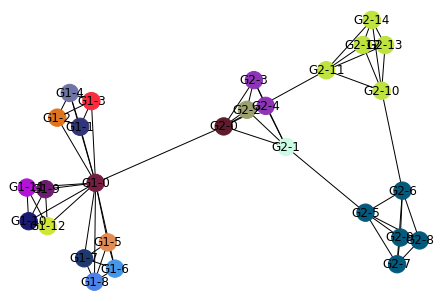

Nodes count: 28
Edges count: 64
Connect: True
{'G1-0'}
{'G1-1'}
{'G1-2'}
{'G1-3'}
{'G1-4'}
{'G1-5'}
{'G1-6'}
{'G1-7'}
{'G1-8'}
{'G1-9'}
{'G1-10'}
{'G1-11'}
{'G1-12'}
{'G2-0'}
{'G2-1'}
{'G2-2'}
{'G2-3'}
{'G2-4'}
{'G2-7', 'G2-6', 'G2-9', 'G2-5', 'G2-8'}
{'G2-10', 'G2-14', 'G2-12', 'G2-13', 'G2-11'}


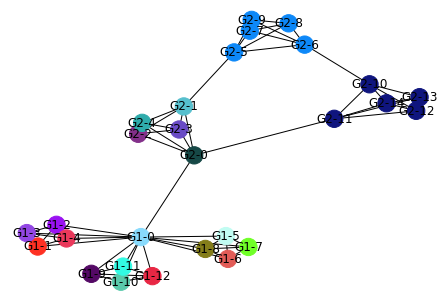

Nodes count: 28
Edges count: 64
Connect: True
{'G1-0'}
{'G1-1'}
{'G1-2'}
{'G1-3'}
{'G1-4'}
{'G1-5'}
{'G1-6'}
{'G1-7'}
{'G1-8'}
{'G1-9'}
{'G1-10'}
{'G1-11'}
{'G1-12'}
{'G2-0'}
{'G2-1'}
{'G2-2'}
{'G2-3'}
{'G2-4'}
{'G2-5'}
{'G2-6', 'G2-9', 'G2-8', 'G2-7'}
{'G2-10', 'G2-14', 'G2-12', 'G2-13', 'G2-11'}


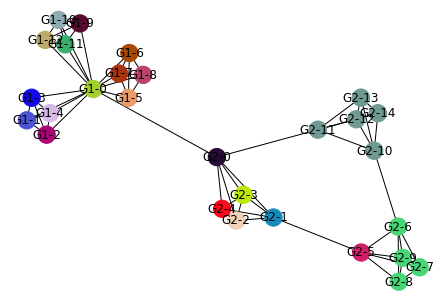

Nodes count: 28
Edges count: 64
Connect: True
{'G1-0'}
{'G1-1'}
{'G1-2'}
{'G1-3'}
{'G1-4'}
{'G1-5'}
{'G1-6'}
{'G1-7'}
{'G1-8'}
{'G1-9'}
{'G1-10'}
{'G1-11'}
{'G1-12'}
{'G2-0'}
{'G2-1'}
{'G2-2'}
{'G2-3'}
{'G2-4'}
{'G2-5'}
{'G2-6'}
{'G2-9', 'G2-8', 'G2-7'}
{'G2-10', 'G2-14', 'G2-12', 'G2-13', 'G2-11'}


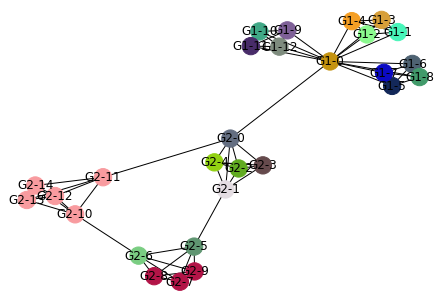

Nodes count: 28
Edges count: 64
Connect: True
{'G1-0'}
{'G1-1'}
{'G1-2'}
{'G1-3'}
{'G1-4'}
{'G1-5'}
{'G1-6'}
{'G1-7'}
{'G1-8'}
{'G1-9'}
{'G1-10'}
{'G1-11'}
{'G1-12'}
{'G2-0'}
{'G2-1'}
{'G2-2'}
{'G2-3'}
{'G2-4'}
{'G2-5'}
{'G2-6'}
{'G2-7'}
{'G2-9', 'G2-8'}
{'G2-10', 'G2-14', 'G2-12', 'G2-13', 'G2-11'}


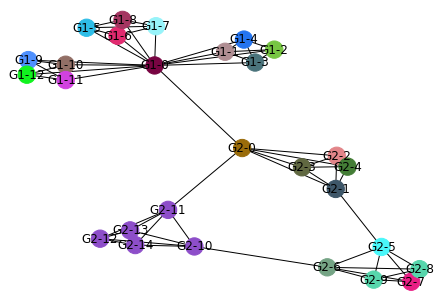

Nodes count: 28
Edges count: 64
Connect: True
{'G1-0'}
{'G1-1'}
{'G1-2'}
{'G1-3'}
{'G1-4'}
{'G1-5'}
{'G1-6'}
{'G1-7'}
{'G1-8'}
{'G1-9'}
{'G1-10'}
{'G1-11'}
{'G1-12'}
{'G2-0'}
{'G2-1'}
{'G2-2'}
{'G2-3'}
{'G2-4'}
{'G2-5'}
{'G2-6'}
{'G2-7'}
{'G2-8'}
{'G2-9'}
{'G2-10', 'G2-14', 'G2-12', 'G2-13', 'G2-11'}


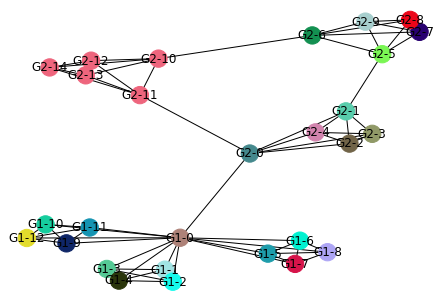

Nodes count: 28
Edges count: 64
Connect: True
{'G1-0'}
{'G1-1'}
{'G1-2'}
{'G1-3'}
{'G1-4'}
{'G1-5'}
{'G1-6'}
{'G1-7'}
{'G1-8'}
{'G1-9'}
{'G1-10'}
{'G1-11'}
{'G1-12'}
{'G2-0'}
{'G2-1'}
{'G2-2'}
{'G2-3'}
{'G2-4'}
{'G2-5'}
{'G2-6'}
{'G2-7'}
{'G2-8'}
{'G2-9'}
{'G2-10'}
{'G2-13', 'G2-14', 'G2-11', 'G2-12'}


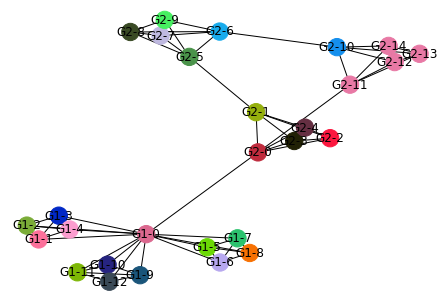

Nodes count: 28
Edges count: 64
Connect: True
{'G1-0'}
{'G1-1'}
{'G1-2'}
{'G1-3'}
{'G1-4'}
{'G1-5'}
{'G1-6'}
{'G1-7'}
{'G1-8'}
{'G1-9'}
{'G1-10'}
{'G1-11'}
{'G1-12'}
{'G2-0'}
{'G2-1'}
{'G2-2'}
{'G2-3'}
{'G2-4'}
{'G2-5'}
{'G2-6'}
{'G2-7'}
{'G2-8'}
{'G2-9'}
{'G2-10'}
{'G2-11'}
{'G2-13', 'G2-14', 'G2-12'}


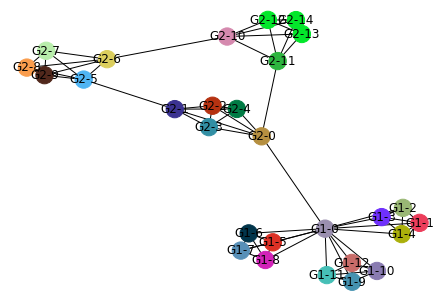

Nodes count: 28
Edges count: 64
Connect: True
{'G1-0'}
{'G1-1'}
{'G1-2'}
{'G1-3'}
{'G1-4'}
{'G1-5'}
{'G1-6'}
{'G1-7'}
{'G1-8'}
{'G1-9'}
{'G1-10'}
{'G1-11'}
{'G1-12'}
{'G2-0'}
{'G2-1'}
{'G2-2'}
{'G2-3'}
{'G2-4'}
{'G2-5'}
{'G2-6'}
{'G2-7'}
{'G2-8'}
{'G2-9'}
{'G2-10'}
{'G2-11'}
{'G2-12'}
{'G2-13', 'G2-14'}


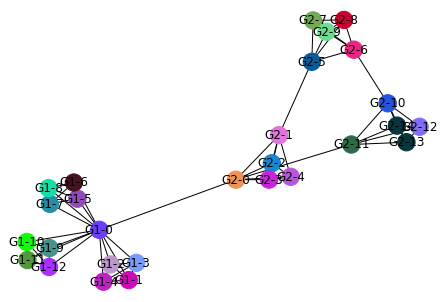

Nodes count: 28
Edges count: 64
Connect: True
{'G1-0'}
{'G1-1'}
{'G1-2'}
{'G1-3'}
{'G1-4'}
{'G1-5'}
{'G1-6'}
{'G1-7'}
{'G1-8'}
{'G1-9'}
{'G1-10'}
{'G1-11'}
{'G1-12'}
{'G2-0'}
{'G2-1'}
{'G2-2'}
{'G2-3'}
{'G2-4'}
{'G2-5'}
{'G2-6'}
{'G2-7'}
{'G2-8'}
{'G2-9'}
{'G2-10'}
{'G2-11'}
{'G2-12'}
{'G2-13'}
{'G2-14'}


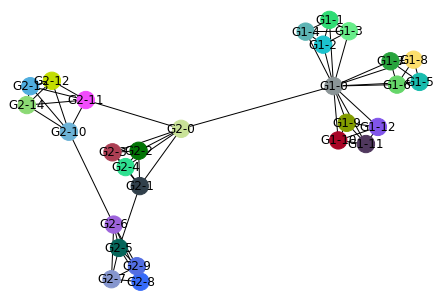

In [7]:
buff = list(girvan_newman(T))

for sub_buff in buff:
    plt.figure()
    painter(T, sub_buff)

# 5
Изучить описание алгоритма Каргера, разработать соответствующую функцию выделения сообществ и применить её к тестовому графу.

In [32]:
# For little-middle graph

def get_split(G):
    T = G.copy()
    nodes = set(T.nodes())

    while True:
        if len(nodes) == 2:
            break
        first_node = r.sample(nodes, 1)
        nodes_neighbors_of_first = T.neighbors(first_node[0])
        nodes_neighbors_of_first = [neighbor for neighbor in nodes_neighbors_of_first]
        second_node = r.sample(nodes_neighbors_of_first, 1)
        nodes_neighbors_of_second = T.neighbors(second_node[0])
        nodes_neighbors_of_second = [neighbor for neighbor in nodes_neighbors_of_second]
        T.remove_node(first_node[0])
        T.remove_node(second_node[0])

        new_node_name = first_node[0]+'/'+second_node[0]
        T.add_node(new_node_name)
        buff = nodes_neighbors_of_first+nodes_neighbors_of_second
        for node in buff:
            T.add_edge(new_node_name, node)

        T.remove_node(first_node[0])
        T.remove_node(second_node[0])
        nodes.add(new_node_name)
        nodes.remove(first_node[0])
        nodes.remove(second_node[0])
        
    nodes = tuple([set(join_nodes.split('/')) for join_nodes in nodes])

    return {
        'cov': coverage(G, nodes),
        'result': nodes,
    }

def karger(T):
    cov = 0
    while cov < 0.95:
        buff_dict = get_split(T)
        cov = buff_dict['cov']
        result = buff_dict['result']
    print(f"coverage = {cov}")
    painter(T, result)

coverage = 0.984375
Nodes count: 28
Edges count: 64
Connect: True
{'G2-11', 'G2-10', 'G2-4', 'G2-7', 'G2-1', 'G2-2', 'G2-3', 'G2-6', 'G2-9', 'G2-14', 'G2-12', 'G2-0', 'G2-5', 'G2-13', 'G2-8'}
{'G1-1', 'G1-6', 'G1-11', 'G1-5', 'G1-0', 'G1-3', 'G1-4', 'G1-9', 'G1-7', 'G1-2', 'G1-8', 'G1-10', 'G1-12'}


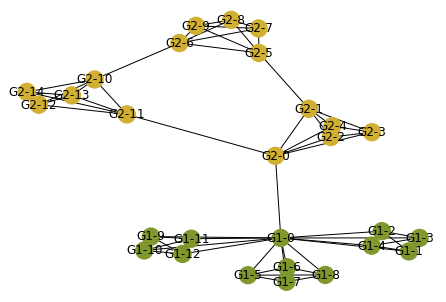

In [34]:
karger(T)

# 6
Модифицировать тестовый граф путём добавления ещё одного ребра (см. рис. ниже). Повторить п.п. 3-5.

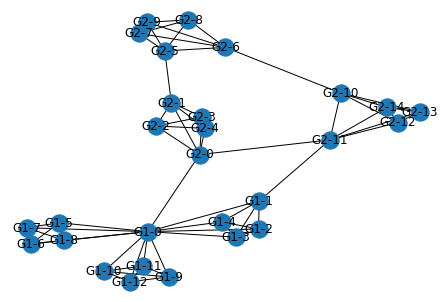

In [29]:
G1 = windmill_graph(3, 5)
G2 = ring_of_cliques(3, 5)
T = nx.union(G1, G2, ("G1-", "G2-"))
T.add_edge("G1-0", "G2-0")
T.add_edge("G1-1", "G2-11")

plot_graph(T)

Рисунок 2: test_graph-2
<img src="test_graph-2.png" width=600>

Nodes count: 28
Edges count: 65
Connect: True
{'G1-6', 'G2-7', 'G2-4', 'G2-1', 'G2-2', 'G1-7', 'G2-3', 'G2-6', 'G2-9', 'G2-0', 'G2-5', 'G1-5', 'G1-8', 'G2-8'}
{'G1-1', 'G2-10', 'G1-11', 'G1-0', 'G1-10', 'G1-3', 'G1-4', 'G2-14', 'G1-9', 'G2-12', 'G2-13', 'G1-2', 'G2-11', 'G1-12'}


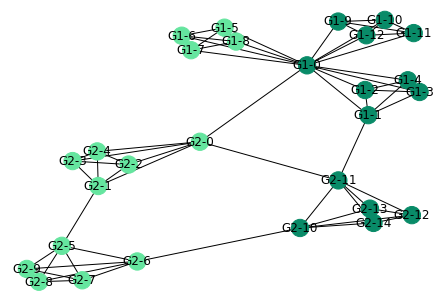

In [15]:
painter(T, kernighan_lin_bisection(T))

Nodes count: 28
Edges count: 65
Connect: True
{'G1-1', 'G1-6', 'G1-11', 'G1-5', 'G1-0', 'G1-2', 'G1-4', 'G1-9', 'G1-7', 'G1-3', 'G1-8', 'G1-10', 'G1-12'}
{'G2-10', 'G2-4', 'G2-7', 'G2-8', 'G2-1', 'G2-2', 'G2-3', 'G2-6', 'G2-9', 'G2-14', 'G2-0', 'G2-5', 'G2-12', 'G2-13', 'G2-11'}


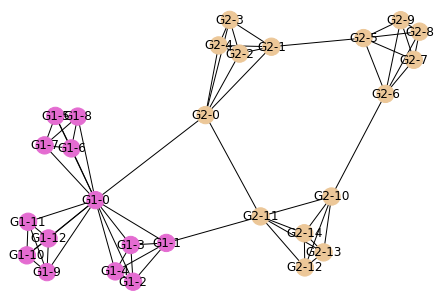

Nodes count: 28
Edges count: 65
Connect: True
{'G1-1', 'G1-6', 'G1-11', 'G1-5', 'G1-0', 'G1-2', 'G1-4', 'G1-9', 'G1-7', 'G1-3', 'G1-8', 'G1-10', 'G1-12'}
{'G2-4', 'G2-1', 'G2-2', 'G2-3', 'G2-0'}
{'G2-11', 'G2-10', 'G2-7', 'G2-6', 'G2-9', 'G2-14', 'G2-5', 'G2-12', 'G2-13', 'G2-8'}


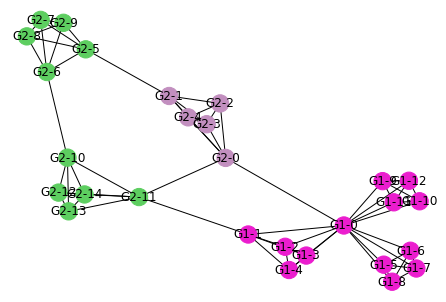

Nodes count: 28
Edges count: 65
Connect: True
{'G1-1', 'G1-6', 'G1-11', 'G1-5', 'G1-0', 'G1-2', 'G1-4', 'G1-9', 'G1-7', 'G1-3', 'G1-8', 'G1-10', 'G1-12'}
{'G2-4', 'G2-1', 'G2-2', 'G2-3', 'G2-0'}
{'G2-7', 'G2-6', 'G2-9', 'G2-5', 'G2-8'}
{'G2-10', 'G2-14', 'G2-12', 'G2-13', 'G2-11'}


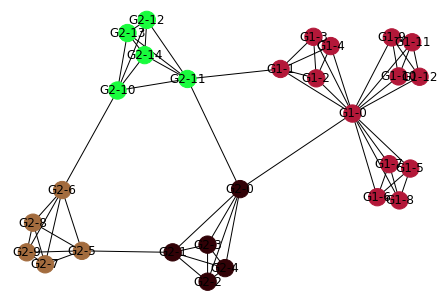

Nodes count: 28
Edges count: 65
Connect: True
{'G1-6', 'G1-11', 'G1-5', 'G1-0', 'G1-9', 'G1-7', 'G1-8', 'G1-10', 'G1-12'}
{'G1-3', 'G1-1', 'G1-2', 'G1-4'}
{'G2-4', 'G2-1', 'G2-2', 'G2-3', 'G2-0'}
{'G2-7', 'G2-6', 'G2-9', 'G2-5', 'G2-8'}
{'G2-10', 'G2-14', 'G2-12', 'G2-13', 'G2-11'}


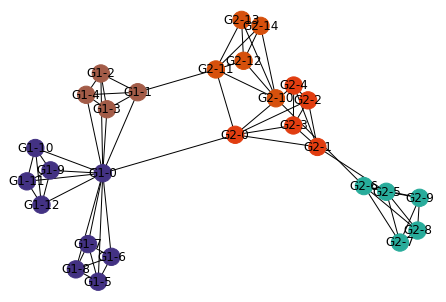

Nodes count: 28
Edges count: 65
Connect: True
{'G1-11', 'G1-0', 'G1-9', 'G1-12', 'G1-10'}
{'G1-3', 'G1-1', 'G1-2', 'G1-4'}
{'G1-6', 'G1-5', 'G1-7', 'G1-8'}
{'G2-4', 'G2-1', 'G2-2', 'G2-3', 'G2-0'}
{'G2-7', 'G2-6', 'G2-9', 'G2-5', 'G2-8'}
{'G2-10', 'G2-14', 'G2-12', 'G2-13', 'G2-11'}


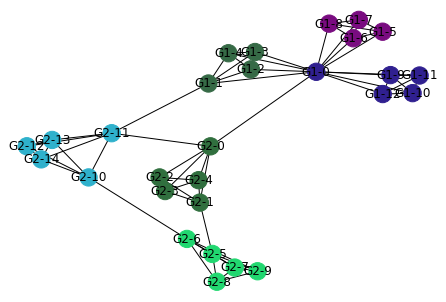

Nodes count: 28
Edges count: 65
Connect: True
{'G1-0'}
{'G1-3', 'G1-1', 'G1-2', 'G1-4'}
{'G1-6', 'G1-5', 'G1-7', 'G1-8'}
{'G1-10', 'G1-12', 'G1-9', 'G1-11'}
{'G2-4', 'G2-1', 'G2-2', 'G2-3', 'G2-0'}
{'G2-7', 'G2-6', 'G2-9', 'G2-5', 'G2-8'}
{'G2-10', 'G2-14', 'G2-12', 'G2-13', 'G2-11'}


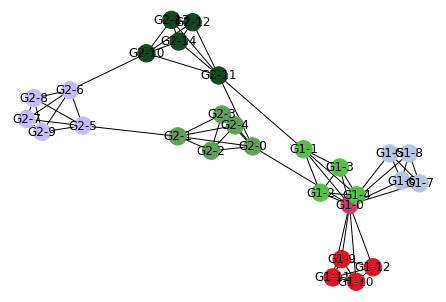

Nodes count: 28
Edges count: 65
Connect: True
{'G1-0'}
{'G1-1'}
{'G1-3', 'G1-2', 'G1-4'}
{'G1-6', 'G1-5', 'G1-7', 'G1-8'}
{'G1-10', 'G1-12', 'G1-9', 'G1-11'}
{'G2-4', 'G2-1', 'G2-2', 'G2-3', 'G2-0'}
{'G2-7', 'G2-6', 'G2-9', 'G2-5', 'G2-8'}
{'G2-10', 'G2-14', 'G2-12', 'G2-13', 'G2-11'}


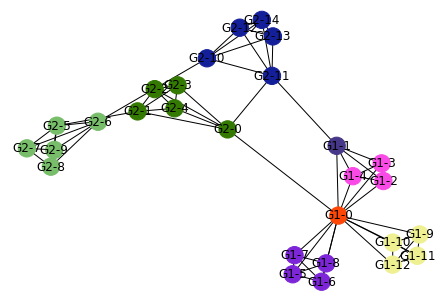

Nodes count: 28
Edges count: 65
Connect: True
{'G1-0'}
{'G1-1'}
{'G1-2'}
{'G1-3', 'G1-4'}
{'G1-6', 'G1-5', 'G1-7', 'G1-8'}
{'G1-10', 'G1-12', 'G1-9', 'G1-11'}
{'G2-4', 'G2-1', 'G2-2', 'G2-3', 'G2-0'}
{'G2-7', 'G2-6', 'G2-9', 'G2-5', 'G2-8'}
{'G2-10', 'G2-14', 'G2-12', 'G2-13', 'G2-11'}


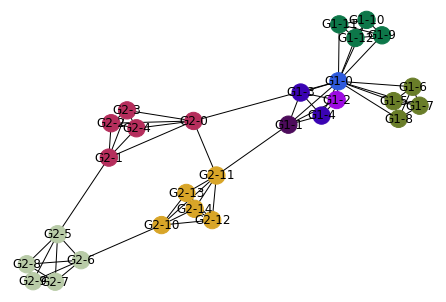

Nodes count: 28
Edges count: 65
Connect: True
{'G1-0'}
{'G1-1'}
{'G1-2'}
{'G1-3'}
{'G1-4'}
{'G1-6', 'G1-5', 'G1-7', 'G1-8'}
{'G1-10', 'G1-12', 'G1-9', 'G1-11'}
{'G2-4', 'G2-1', 'G2-2', 'G2-3', 'G2-0'}
{'G2-7', 'G2-6', 'G2-9', 'G2-5', 'G2-8'}
{'G2-10', 'G2-14', 'G2-12', 'G2-13', 'G2-11'}


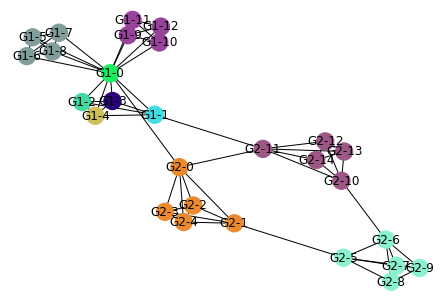

Nodes count: 28
Edges count: 65
Connect: True
{'G1-0'}
{'G1-1'}
{'G1-2'}
{'G1-3'}
{'G1-4'}
{'G1-5'}
{'G1-8', 'G1-7', 'G1-6'}
{'G1-10', 'G1-12', 'G1-9', 'G1-11'}
{'G2-4', 'G2-1', 'G2-2', 'G2-3', 'G2-0'}
{'G2-7', 'G2-6', 'G2-9', 'G2-5', 'G2-8'}
{'G2-10', 'G2-14', 'G2-12', 'G2-13', 'G2-11'}


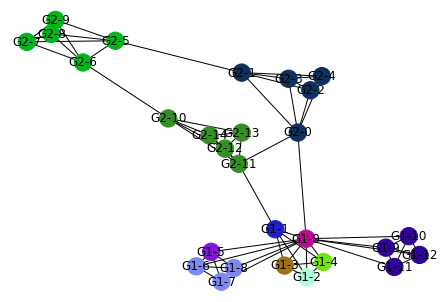

Nodes count: 28
Edges count: 65
Connect: True
{'G1-0'}
{'G1-1'}
{'G1-2'}
{'G1-3'}
{'G1-4'}
{'G1-5'}
{'G1-6'}
{'G1-7', 'G1-8'}
{'G1-10', 'G1-12', 'G1-9', 'G1-11'}
{'G2-4', 'G2-1', 'G2-2', 'G2-3', 'G2-0'}
{'G2-7', 'G2-6', 'G2-9', 'G2-5', 'G2-8'}
{'G2-10', 'G2-14', 'G2-12', 'G2-13', 'G2-11'}


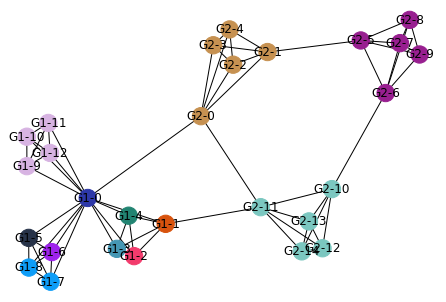

Nodes count: 28
Edges count: 65
Connect: True
{'G1-0'}
{'G1-1'}
{'G1-2'}
{'G1-3'}
{'G1-4'}
{'G1-5'}
{'G1-6'}
{'G1-7'}
{'G1-8'}
{'G1-10', 'G1-12', 'G1-9', 'G1-11'}
{'G2-4', 'G2-1', 'G2-2', 'G2-3', 'G2-0'}
{'G2-7', 'G2-6', 'G2-9', 'G2-5', 'G2-8'}
{'G2-10', 'G2-14', 'G2-12', 'G2-13', 'G2-11'}


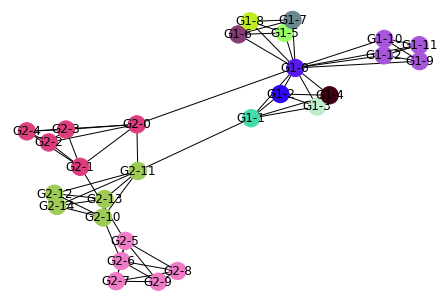

Nodes count: 28
Edges count: 65
Connect: True
{'G1-0'}
{'G1-1'}
{'G1-2'}
{'G1-3'}
{'G1-4'}
{'G1-5'}
{'G1-6'}
{'G1-7'}
{'G1-8'}
{'G1-9'}
{'G1-11', 'G1-12', 'G1-10'}
{'G2-4', 'G2-1', 'G2-2', 'G2-3', 'G2-0'}
{'G2-7', 'G2-6', 'G2-9', 'G2-5', 'G2-8'}
{'G2-10', 'G2-14', 'G2-12', 'G2-13', 'G2-11'}


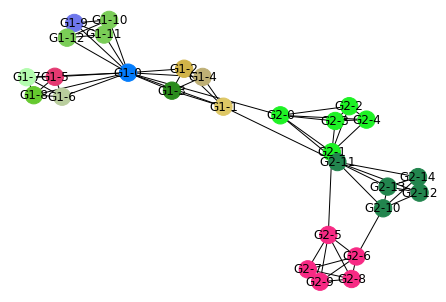

Nodes count: 28
Edges count: 65
Connect: True
{'G1-0'}
{'G1-1'}
{'G1-2'}
{'G1-3'}
{'G1-4'}
{'G1-5'}
{'G1-6'}
{'G1-7'}
{'G1-8'}
{'G1-9'}
{'G1-10'}
{'G1-12', 'G1-11'}
{'G2-4', 'G2-1', 'G2-2', 'G2-3', 'G2-0'}
{'G2-7', 'G2-6', 'G2-9', 'G2-5', 'G2-8'}
{'G2-10', 'G2-14', 'G2-12', 'G2-13', 'G2-11'}


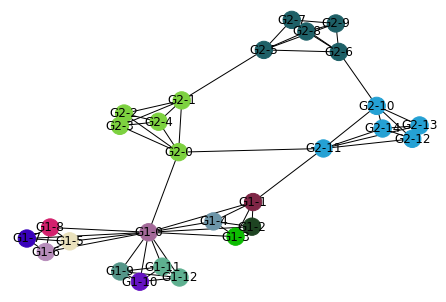

Nodes count: 28
Edges count: 65
Connect: True
{'G1-0'}
{'G1-1'}
{'G1-2'}
{'G1-3'}
{'G1-4'}
{'G1-5'}
{'G1-6'}
{'G1-7'}
{'G1-8'}
{'G1-9'}
{'G1-10'}
{'G1-11'}
{'G1-12'}
{'G2-4', 'G2-1', 'G2-2', 'G2-3', 'G2-0'}
{'G2-7', 'G2-6', 'G2-9', 'G2-5', 'G2-8'}
{'G2-10', 'G2-14', 'G2-12', 'G2-13', 'G2-11'}


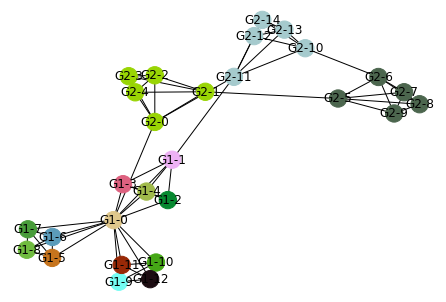

Nodes count: 28
Edges count: 65
Connect: True
{'G1-0'}
{'G1-1'}
{'G1-2'}
{'G1-3'}
{'G1-4'}
{'G1-5'}
{'G1-6'}
{'G1-7'}
{'G1-8'}
{'G1-9'}
{'G1-10'}
{'G1-11'}
{'G1-12'}
{'G2-0'}
{'G2-1', 'G2-2', 'G2-3', 'G2-4'}
{'G2-7', 'G2-6', 'G2-9', 'G2-5', 'G2-8'}
{'G2-10', 'G2-14', 'G2-12', 'G2-13', 'G2-11'}


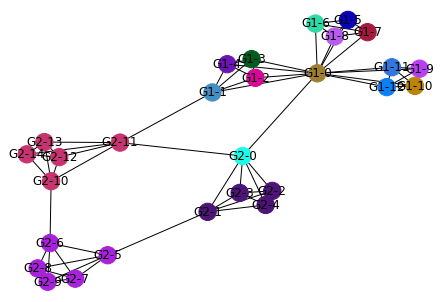

Nodes count: 28
Edges count: 65
Connect: True
{'G1-0'}
{'G1-1'}
{'G1-2'}
{'G1-3'}
{'G1-4'}
{'G1-5'}
{'G1-6'}
{'G1-7'}
{'G1-8'}
{'G1-9'}
{'G1-10'}
{'G1-11'}
{'G1-12'}
{'G2-0'}
{'G2-1'}
{'G2-2', 'G2-3', 'G2-4'}
{'G2-7', 'G2-6', 'G2-9', 'G2-5', 'G2-8'}
{'G2-10', 'G2-14', 'G2-12', 'G2-13', 'G2-11'}


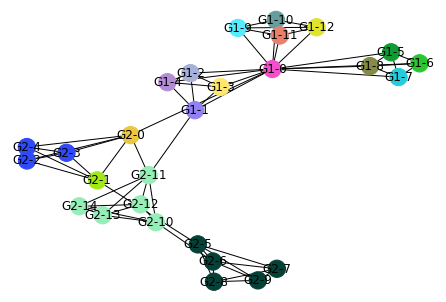

Nodes count: 28
Edges count: 65
Connect: True
{'G1-0'}
{'G1-1'}
{'G1-2'}
{'G1-3'}
{'G1-4'}
{'G1-5'}
{'G1-6'}
{'G1-7'}
{'G1-8'}
{'G1-9'}
{'G1-10'}
{'G1-11'}
{'G1-12'}
{'G2-0'}
{'G2-1'}
{'G2-2'}
{'G2-3', 'G2-4'}
{'G2-7', 'G2-6', 'G2-9', 'G2-5', 'G2-8'}
{'G2-10', 'G2-14', 'G2-12', 'G2-13', 'G2-11'}


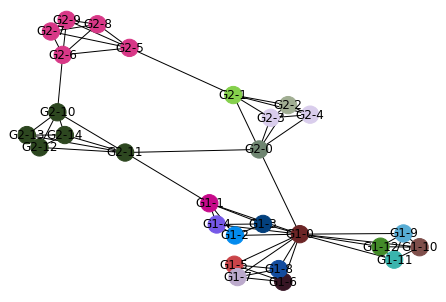

Nodes count: 28
Edges count: 65
Connect: True
{'G1-0'}
{'G1-1'}
{'G1-2'}
{'G1-3'}
{'G1-4'}
{'G1-5'}
{'G1-6'}
{'G1-7'}
{'G1-8'}
{'G1-9'}
{'G1-10'}
{'G1-11'}
{'G1-12'}
{'G2-0'}
{'G2-1'}
{'G2-2'}
{'G2-3'}
{'G2-4'}
{'G2-7', 'G2-6', 'G2-9', 'G2-5', 'G2-8'}
{'G2-10', 'G2-14', 'G2-12', 'G2-13', 'G2-11'}


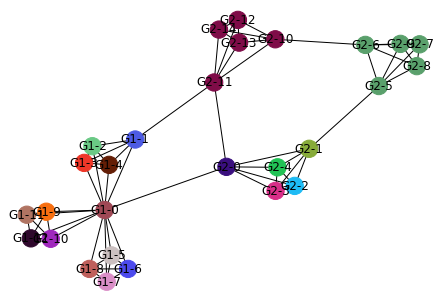

Nodes count: 28
Edges count: 65
Connect: True
{'G1-0'}
{'G1-1'}
{'G1-2'}
{'G1-3'}
{'G1-4'}
{'G1-5'}
{'G1-6'}
{'G1-7'}
{'G1-8'}
{'G1-9'}
{'G1-10'}
{'G1-11'}
{'G1-12'}
{'G2-0'}
{'G2-1'}
{'G2-2'}
{'G2-3'}
{'G2-4'}
{'G2-5'}
{'G2-6', 'G2-9', 'G2-8', 'G2-7'}
{'G2-10', 'G2-14', 'G2-12', 'G2-13', 'G2-11'}


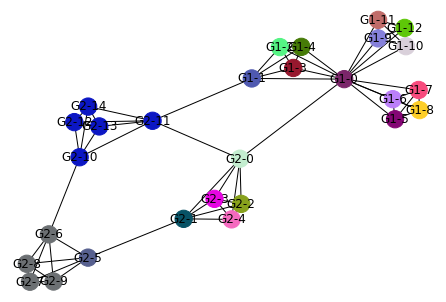

Nodes count: 28
Edges count: 65
Connect: True
{'G1-0'}
{'G1-1'}
{'G1-2'}
{'G1-3'}
{'G1-4'}
{'G1-5'}
{'G1-6'}
{'G1-7'}
{'G1-8'}
{'G1-9'}
{'G1-10'}
{'G1-11'}
{'G1-12'}
{'G2-0'}
{'G2-1'}
{'G2-2'}
{'G2-3'}
{'G2-4'}
{'G2-5'}
{'G2-6'}
{'G2-9', 'G2-8', 'G2-7'}
{'G2-10', 'G2-14', 'G2-12', 'G2-13', 'G2-11'}


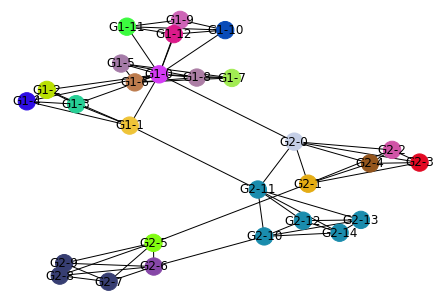

Nodes count: 28
Edges count: 65
Connect: True
{'G1-0'}
{'G1-1'}
{'G1-2'}
{'G1-3'}
{'G1-4'}
{'G1-5'}
{'G1-6'}
{'G1-7'}
{'G1-8'}
{'G1-9'}
{'G1-10'}
{'G1-11'}
{'G1-12'}
{'G2-0'}
{'G2-1'}
{'G2-2'}
{'G2-3'}
{'G2-4'}
{'G2-5'}
{'G2-6'}
{'G2-7'}
{'G2-9', 'G2-8'}
{'G2-10', 'G2-14', 'G2-12', 'G2-13', 'G2-11'}


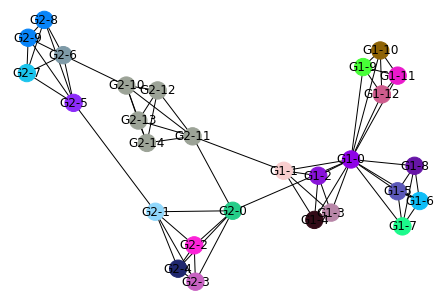

Nodes count: 28
Edges count: 65
Connect: True
{'G1-0'}
{'G1-1'}
{'G1-2'}
{'G1-3'}
{'G1-4'}
{'G1-5'}
{'G1-6'}
{'G1-7'}
{'G1-8'}
{'G1-9'}
{'G1-10'}
{'G1-11'}
{'G1-12'}
{'G2-0'}
{'G2-1'}
{'G2-2'}
{'G2-3'}
{'G2-4'}
{'G2-5'}
{'G2-6'}
{'G2-7'}
{'G2-8'}
{'G2-9'}
{'G2-10', 'G2-14', 'G2-12', 'G2-13', 'G2-11'}


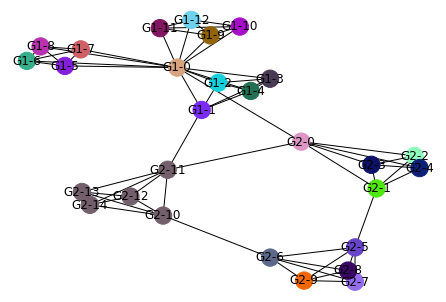

Nodes count: 28
Edges count: 65
Connect: True
{'G1-0'}
{'G1-1'}
{'G1-2'}
{'G1-3'}
{'G1-4'}
{'G1-5'}
{'G1-6'}
{'G1-7'}
{'G1-8'}
{'G1-9'}
{'G1-10'}
{'G1-11'}
{'G1-12'}
{'G2-0'}
{'G2-1'}
{'G2-2'}
{'G2-3'}
{'G2-4'}
{'G2-5'}
{'G2-6'}
{'G2-7'}
{'G2-8'}
{'G2-9'}
{'G2-10'}
{'G2-13', 'G2-14', 'G2-11', 'G2-12'}


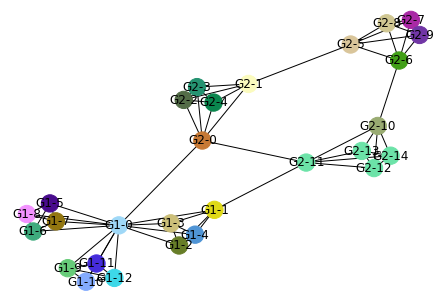

Nodes count: 28
Edges count: 65
Connect: True
{'G1-0'}
{'G1-1'}
{'G1-2'}
{'G1-3'}
{'G1-4'}
{'G1-5'}
{'G1-6'}
{'G1-7'}
{'G1-8'}
{'G1-9'}
{'G1-10'}
{'G1-11'}
{'G1-12'}
{'G2-0'}
{'G2-1'}
{'G2-2'}
{'G2-3'}
{'G2-4'}
{'G2-5'}
{'G2-6'}
{'G2-7'}
{'G2-8'}
{'G2-9'}
{'G2-10'}
{'G2-11'}
{'G2-13', 'G2-14', 'G2-12'}


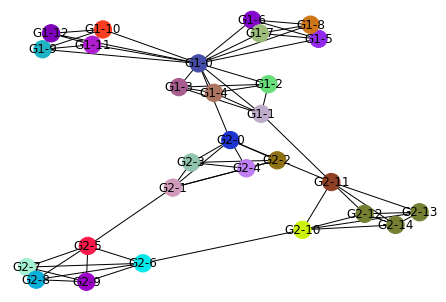

Nodes count: 28
Edges count: 65
Connect: True
{'G1-0'}
{'G1-1'}
{'G1-2'}
{'G1-3'}
{'G1-4'}
{'G1-5'}
{'G1-6'}
{'G1-7'}
{'G1-8'}
{'G1-9'}
{'G1-10'}
{'G1-11'}
{'G1-12'}
{'G2-0'}
{'G2-1'}
{'G2-2'}
{'G2-3'}
{'G2-4'}
{'G2-5'}
{'G2-6'}
{'G2-7'}
{'G2-8'}
{'G2-9'}
{'G2-10'}
{'G2-11'}
{'G2-12'}
{'G2-13', 'G2-14'}


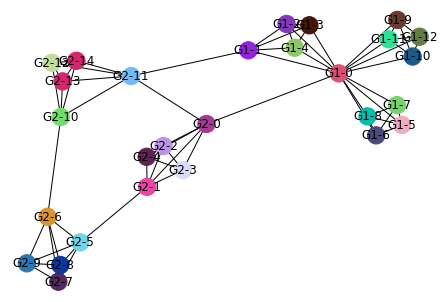

Nodes count: 28
Edges count: 65
Connect: True
{'G1-0'}
{'G1-1'}
{'G1-2'}
{'G1-3'}
{'G1-4'}
{'G1-5'}
{'G1-6'}
{'G1-7'}
{'G1-8'}
{'G1-9'}
{'G1-10'}
{'G1-11'}
{'G1-12'}
{'G2-0'}
{'G2-1'}
{'G2-2'}
{'G2-3'}
{'G2-4'}
{'G2-5'}
{'G2-6'}
{'G2-7'}
{'G2-8'}
{'G2-9'}
{'G2-10'}
{'G2-11'}
{'G2-12'}
{'G2-13'}
{'G2-14'}


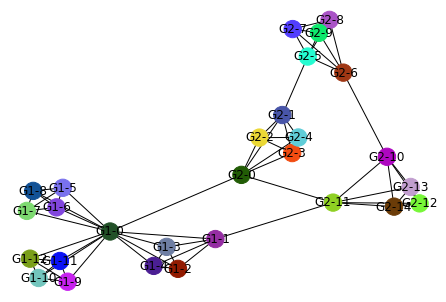

In [16]:
buff = list(girvan_newman(T))

for sub_buff in buff:
    painter(T, sub_buff)

coverage = 0.9692307692307692
Nodes count: 28
Edges count: 65
Connect: True
{'G1-1', 'G1-6', 'G1-11', 'G1-5', 'G1-0', 'G1-7', 'G1-3', 'G1-4', 'G1-9', 'G1-12', 'G1-2', 'G1-8', 'G1-10'}
{'G2-11', 'G2-10', 'G2-4', 'G2-7', 'G2-1', 'G2-2', 'G2-3', 'G2-6', 'G2-9', 'G2-14', 'G2-12', 'G2-5', 'G2-0', 'G2-13', 'G2-8'}


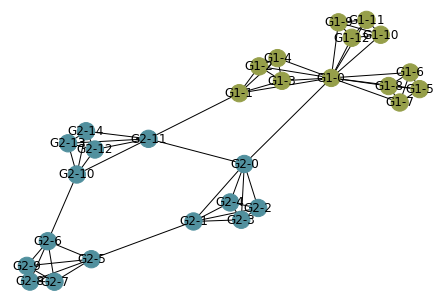

In [31]:
karger(T)